# Capitulo 2
- En este capitulo se construira un proyecto end-to-end
## Pipeline
- es una secuencia de procesamiento de datos, compuestos de diferentes componentes que transforman y almacenan los datos
- Datos -> Modelo -> Almacenamiento -> Modelo -> Almacenamiento
- Cada componente es independiente y los otros pueden seguir funcionando si uno falla
- Se requiere monitorizacion para la correcta funcion del modelo
## Proyecto
- Predecira el valor de una propiedad segun ciertas caracteristicas
- Entrenamiento supervisado y plain batch, ya que los datos estan etiquetados y estos caben en memoria
- Ya que se pide predecir un valor, este es un problema de regresion multiple univariable, si se pidiera predecir varias variables seria multivariable, multiple por que recibe varias caracteristicas
## Elegir una medida de desempeño
- Para este problema de regresion se eligio root mean square error que nos da una idea de que tanto error hay en las predicciones del modelo dandole un peso mayor a los errores grandes
$$
\text{RMSE}(X, h) = \sqrt{\frac{1}{m} \sum_{i=1}^m \left( h\left(\mathbf{x}^{(i)}\right) - y^{(i)} \right)^2}
$$
### Notacion
- $m$ es el numero de instancias en el data set 
- $x$ es un vector con todos los valores de las caracteristicas de la instanca sin su etiqueta 
- $y$ es la etiqueta
- $X$ es la matriz que contiene to dos los valores de las caracteristicas sin las es etiquetas de todas las instancias en el data set
$$
\mathbf{X} =
\begin{pmatrix}
\mathbf{x}^{(1)T} \\
\mathbf{x}^{(2)T} \\
\vdots \\
\mathbf{x}^{(1999)T} \\
\mathbf{x}^{(2000)T}
\end{pmatrix}
=
\begin{pmatrix}
-118.29 & 33.91 & 1,416 & 38,372 \\
\vdots & \vdots & \vdots & \vdots
\end{pmatrix}
$$
- $h$ es la hipotesis, o sea la funcion de prediccion del modelo, asi pues, $ŷ(1) = h(x(1)) = 158,400$, entonces el error de prediccion seria $ŷ(1) – y(1) = 2,000$
- $RMSE(X, h)$ es la funcion de coste medida en el data set usando la hipotesis $h$
## Otras medida de desempeño
- RMSE es mas sensible a outliers, ya que al elevar al cuadrado se simplifica debido a que ambos valores son positivos
-  Mean absolute error:
	- A pesar de que RMSE es la preferida cuando se tratan problemas de regresion, cuando hay muchos outliers se puede preferir esta
	- Es menos sensible a outliers ya que al calcular el valor absoluto de la distancia no existen diagonales
- Estos miden las distacias entre vectores
- RMSE es norma $l_2$ ya que eleva los valores mientras que MAE es $l_1$
- La norma $l_0$ cuenta el numero de elementos no nulos
- La norma $l_\infty$ toma el valor absoluto mas grande del vector
- Entre mas alta la norma se enfocara mas en los valores grandes y olvidara los pequeños
- Las normas mas bajas trataran los valores de manera mas uniforme
### Cuándo usar RMSE vs MAE:
- Usa **RMSE** cuando los **valores extremos** (outliers) son raros o no muy significativos.
  - **Ejemplo:** Si los datos siguen una distribución normal (campana de Gauss).
- Usa **MAE** cuando quieres medir el **error promedio** sin preocuparte por amplificar errores grandes.

## Obtener los datos

In [56]:
from pathlib import Path
import pandas as pd 
import tarfile
import urllib.request

def load_housing_data():
	tarball_path = Path("datasets/housing.tgz")
	if not tarball_path.is_file():
		Path("datasets").mkdir(parents=True, exist_ok=True)
		url = "https://github.com/ageron/data/raw/main/housing.tgz"
		urllib.request.urlretrieve(url, tarball_path)
		with tarfile.open(tarball_path) as housing_tarball:
			housing_tarball.extractall(path="datasets")
	return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [24]:
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14310,-117.11,33.11,17.0,2641.0,627.0,1167.0,647.0,2.2875,132400.0,<1H OCEAN
13199,-118.17,34.10,48.0,2514.0,595.0,2484.0,601.0,3.1146,142500.0,<1H OCEAN
15608,-120.35,37.04,37.0,1495.0,292.0,858.0,275.0,2.9306,46300.0,INLAND
2432,-118.42,33.92,41.0,1621.0,279.0,756.0,277.0,5.0594,346000.0,<1H OCEAN
17355,-122.25,37.50,44.0,348.0,79.0,154.0,73.0,4.7708,253800.0,NEAR OCEAN


In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [29]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


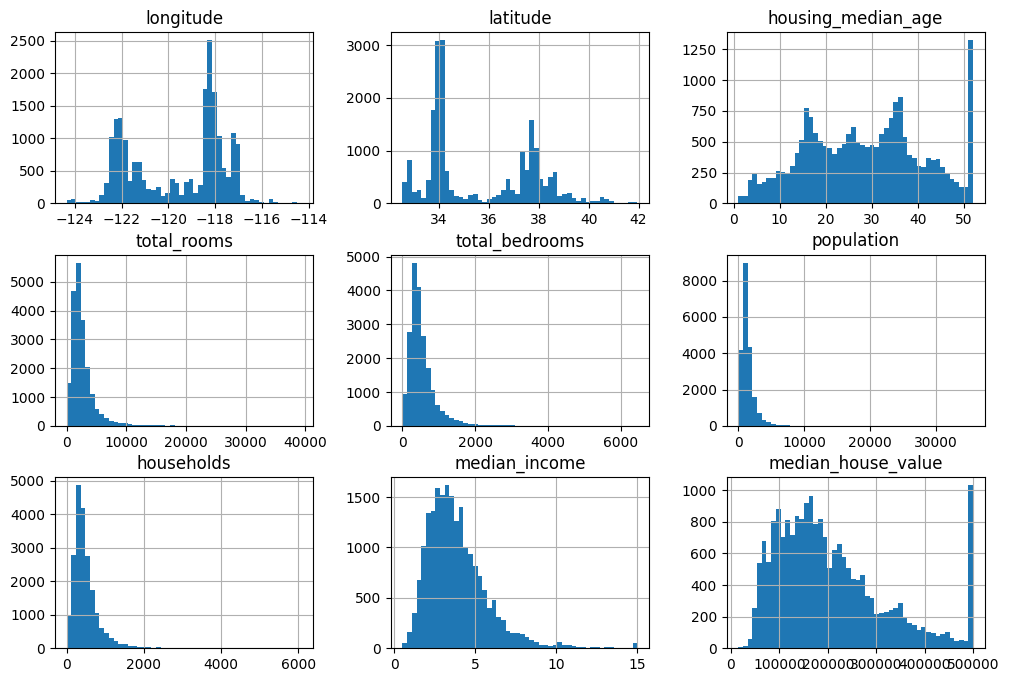

In [30]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()

## Consideraciones acerca de los datos
### 1. **Ingreso medio no está en dólares exactos**
- El atributo de ingreso medio no representa valores reales en dólares estadounidenses (USD). 
- Los datos fueron **escalados y limitados**:
  - **Límite superior:** 15 (en realidad 15.0001), que representa ingresos medianos altos.
  - **Límite inferior:** 0.5 (en realidad 0.4999), que representa ingresos medianos bajos.
  - **Interpretación:** Los valores indican aproximadamente decenas de miles de dólares (por ejemplo, un 3 representa $30,000).
- **Nota:** Trabajar con datos preprocesados es común en Machine Learning, pero es importante entender cómo se generaron los datos para evitar problemas.

### 2. **Edades de viviendas y precios están limitados**
- Tanto la **edad mediana de las viviendas** como el **valor medio de las casas** fueron **capped** (limitados):
  - Esto puede ser un problema porque:
    - El valor medio de las casas es tu **objetivo a predecir** (etiquetas).
    - Si los precios no pueden superar un límite (por ejemplo, $500,000), tu modelo podría aprender incorrectamente que no hay valores más altos.
- **Soluciones posibles:**
  - **a.** Conseguir etiquetas correctas para las zonas donde los datos están limitados.
  - **b.** Eliminar esas zonas tanto del conjunto de entrenamiento como del de prueba, para evitar sesgos en el modelo.

### 3. **Atributos con escalas diferentes**
- Los atributos (características) tienen **escalas muy distintas**, lo que puede dificultar el entrenamiento del modelo.
- Más adelante, será necesario aplicar **escalado de características** (feature scaling) para normalizar las escalas.

### 4. **Distribuciones asimétricas**
- Muchos atributos tienen **colas pesadas** (tail heavy):
  - La distribución se extiende mucho hacia la derecha, más allá de la mediana.
  - Esto puede complicar la detección de patrones por algunos algoritmos de Machine Learning.
- **Solución:** Transformar estos atributos para que tengan distribuciones más parecidas a una campana (distribución normal).

## Crear el test set

In [31]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
	shuffled_indices = np.random.permutation(len(housing))
	test_set_size = int(len(data) * test_ratio)
	test_indices = shuffled_indices[:test_set_size]
	train_indices = shuffled_indices[test_set_size:]
	return data.iloc[train_indices], data.iloc[test_indices]

In [32]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [33]:
print(f"test set lenght: {len(test_set)} - train set lenght: {len(train_set)}")

test set lenght: 4128 - train set lenght: 16512


- Esta manera de separar los datos no es la mas optima ya que no nos garantiza que el test set sea constante por lo que con el tiempo el modelo tendra acceso a todos los datos, por lo que otra solucion es seleccionar ciertos indices usando su hash

In [34]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
	return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
	ids = data[id_column]
	in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
	return data.loc[~in_test_set], data.loc[in_test_set]



In [35]:
# se crea una columna de indices
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [36]:
# Usando caracteristica estables para definir como se dividiran los datos
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [37]:
# Funcion de scikit para dividar data sets
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- los metodos de separacion aleatorios si el dataset es suficientemente grande, de lo contrario esto puede generar sampling bias (sesgo de muestreo) lo que puede hacer que los datos no sean representativos

## Muestreo Aleatorio Puro vs. Muestreo Estratificado

### 1. Muestreo Aleatorio Puro (Purely Random Sampling)
- Consiste en seleccionar instancias de forma completamente aleatoria, sin criterios adicionales.

#### **Ventajas:**
- Funciona bien si el conjunto de datos es **lo suficientemente grande**, ya que las probabilidades de sesgo disminuyen.

#### **Desventajas:**
- Si el conjunto de datos es pequeño, **la muestra podría no ser representativa de la población**, lo que introduce **sesgo de muestreo (sampling bias)**.

#### **Ejemplo de problema con muestreo aleatorio puro:**
- Quieres estudiar las opiniones de estadounidenses y seleccionas 1,000 personas al azar de una guía telefónica.
- Podrías terminar con un desequilibrio significativo en la proporción de hombres y mujeres (por ejemplo, más del 54% hombres o menos del 49% mujeres), lo que genera resultados sesgados.

---

### 2. Muestreo Estratificado (Stratified Sampling)
- Divide la población en **subgrupos homogéneos** llamados **estratos** (por ejemplo, género, edad, nivel de ingresos).
- Selecciona un número proporcional de instancias de cada estrato para garantizar que la muestra refleje las proporciones de la población.

#### **Ventajas:**
- Asegura que la muestra sea representativa incluso cuando el conjunto de datos es pequeño.
  
#### **Ejemplo de muestreo estratificado:**
- En Estados Unidos, el 51.3% de la población es mujer y el 48.7% es hombre.
- Para seleccionar 1,000 personas representativas:
  - Escogerías 513 mujeres (51.3% de 1,000).
  - Escogerías 487 hombres (48.7% de 1,000).
- Esto garantiza que la proporción de géneros en la muestra sea igual a la proporción en la población.

---

### ¿Por qué es importante el muestreo estratificado?
- Con el muestreo aleatorio puro, hay un **12% de probabilidad** de que la muestra tenga una proporción de mujeres menor al 49% o mayor al 54%. Esto sesgaría los resultados.
- El muestreo estratificado **reduce este riesgo** al garantizar que los subgrupos importantes estén representados correctamente.

---

### Resumen
El muestreo aleatorio puro es adecuado para conjuntos de datos grandes, pero puede generar sesgos en muestras pequeñas porque algunos grupos podrían quedar subrepresentados. El muestreo estratificado, en cambio, asegura que la muestra sea representativa dividiendo la población en estratos y seleccionando instancias de cada uno de forma proporcional.


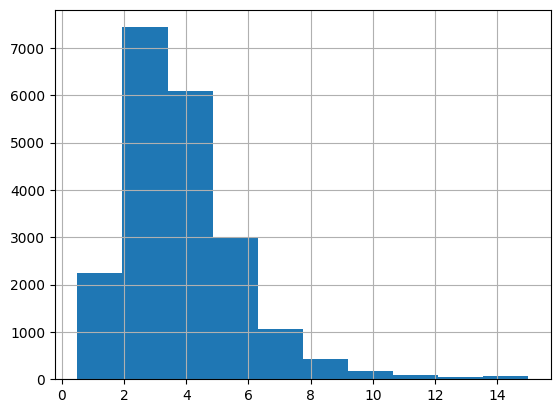

In [39]:
housing["median_income"].hist()
plt.show()

In [60]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

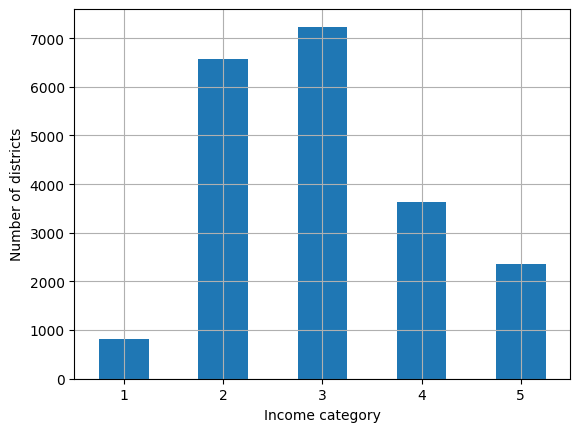

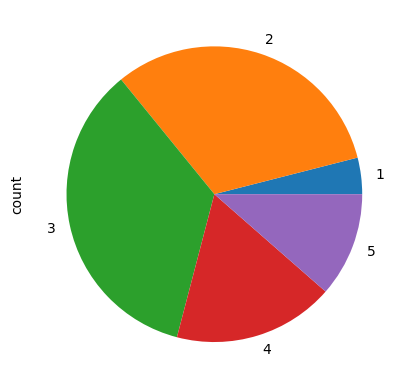

In [61]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()
housing["income_cat"].value_counts().sort_index().plot.pie()
plt.show()

## Muestreo estratificado

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
	strat_train_set_n = housing.iloc[train_index]
	strat_test_set_n = housing.iloc[test_index]
	strat_splits.append([strat_train_set_n, strat_test_set_n])

In [44]:
strat_train_set, strat_test_set = strat_splits[0]

In [64]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Crear un conjunto de datos simple con una columna de categoría 'income_cat'
data = {
    'district': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'income_cat': [1, 2, 1, 3, 2, 1, 3, 2, 1, 3]  # Categoría de ingresos
}

# Convertir a un DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar el DataFrame
print("Dataset original:")
print(df)

# Instanciar el StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.4, random_state=42)

# Lista para almacenar las divisiones
strat_splits = []

# Realizar las divisiones
for train_index, test_index in splitter.split(df, df["income_cat"]):
    strat_train_set = df.iloc[train_index]  # Conjunto de entrenamiento
    strat_test_set = df.iloc[test_index]    # Conjunto de prueba
    strat_splits.append([strat_train_set, strat_test_set])

    # Imprimir los conjuntos de entrenamiento y prueba de cada división
    print("\nConjunto de entrenamiento:")
    print(strat_train_set)
    print("\nConjunto de prueba:")
    print(strat_test_set)


Dataset original:
  district  income_cat
0        A           1
1        B           2
2        C           1
3        D           3
4        E           2
5        F           1
6        G           3
7        H           2
8        I           1
9        J           3

Conjunto de entrenamiento:
  district  income_cat
9        J           3
2        C           1
4        E           2
6        G           3
1        B           2
5        F           1

Conjunto de prueba:
  district  income_cat
7        H           2
8        I           1
0        A           1
3        D           3

Conjunto de entrenamiento:
  district  income_cat
7        H           2
9        J           3
3        D           3
0        A           1
4        E           2
2        C           1

Conjunto de prueba:
  district  income_cat
1        B           2
5        F           1
6        G           3
8        I           1

Conjunto de entrenamiento:
  district  income_cat
2        C           1
5    

In [65]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [66]:
# proporcion con test set estratifcado
strat_test_set["income_cat"].value_counts().sort_index() / len(strat_test_set)

income_cat
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: count, dtype: float64

In [68]:
# proporcion del data set
housing["income_cat"].value_counts().sort_index() / len(housing)

income_cat
1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: count, dtype: float64

In [69]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [70]:
for set_ in (strat_train_set, strat_test_set):
	set_.drop("income_cat", axis=1, inplace=True)

In [71]:
len(strat_train_set), len(strat_test_set)

(16512, 4128)

## Visualizar los datos
- Para explorar los datos en mas profundidad se puede requerir hacer un exploration set para dejar intacto el training set

In [72]:
housing = strat_train_set.copy()

## Visualizacion de datos geograficos

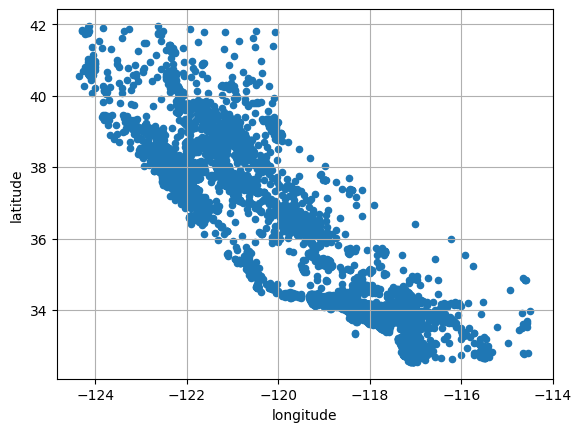

In [73]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

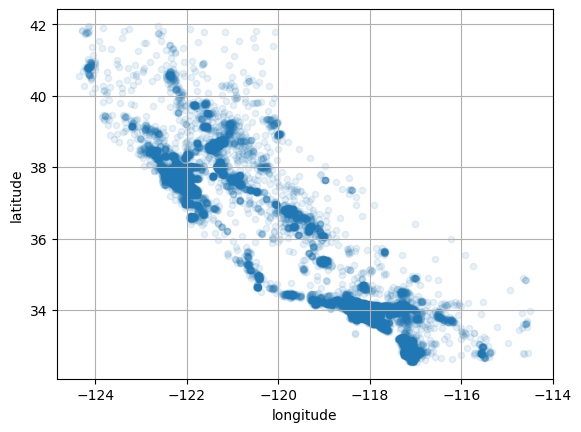

In [74]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.1)
plt.show()

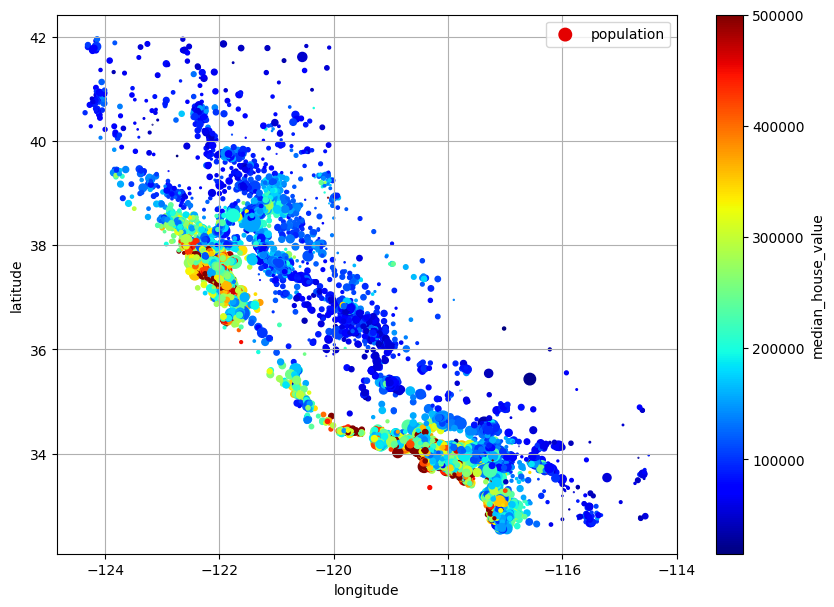

In [75]:
housing.plot(kind="scatter", 
			 x="longitude", 
			 y="latitude",
			 grid=True, 
			 s=housing["population"] / 100,
			 label="population", 
			 c="median_house_value", 
			 cmap="jet",
			 colorbar=True,
			 legend=True, 
			 sharex=False, 
			 figsize=(10, 7)
			)
plt.show()

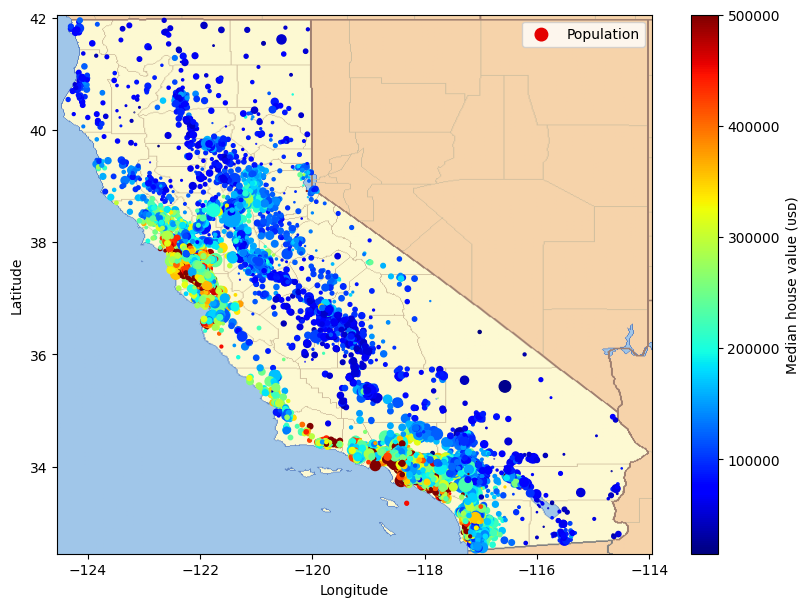

In [76]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
	homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
	url = homl3_root + "images/end_to_end_project/" + filename
	print("Downloading", filename)
	urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})

housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))	

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

## Buscando correlaciones
- Debido a que el dataset no es tan grande se puede calcular el coeficiente de correlacion estandar (pearson)
## Coeficiente de Correlación de Pearson

El **coeficiente de correlación de Pearson** es una medida que nos dice cuán fuerte es la relación lineal entre dos variables. En otras palabras, nos ayuda a entender si dos variables cambian de manera similar y qué tan fuerte es esa relación.

### Conceptos clave:
- **Relación lineal**: El coeficiente de Pearson mide la relación de tipo lineal, es decir, cómo una variable cambia de manera constante en relación con otra.
- **Valores**: El valor del coeficiente de Pearson puede estar entre **-1 y 1**:
  - **1**: Indica una relación **positiva perfecta**, es decir, cuando una variable aumenta, la otra también aumenta de manera proporcional.
  - **-1**: Indica una relación **negativa perfecta**, es decir, cuando una variable aumenta, la otra disminuye de manera proporcional.
  - **0**: Indica **ninguna relación lineal**. Las variables no tienen una relación directa, o la relación no es lineal.
  
### Ejemplo sencillo:
Imagina que tienes dos variables:
- **Horas de estudio** (X)
- **Puntaje en un examen** (Y)

Si el coeficiente de Pearson entre estas dos variables es **0.9**, significa que hay una fuerte relación positiva entre el número de horas de estudio y el puntaje en el examen: **si estudias más, es probable que tu puntaje sea más alto**.

Si el coeficiente es **-0.9**, significa que hay una relación negativa fuerte: **si una variable aumenta, la otra disminuye**.

### Fórmula:
El cálculo exacto del coeficiente de Pearson se basa en la **covarianza** entre las dos variables y la **desviación estándar** de cada una, pero lo importante es saber que un valor cercano a **1** o **-1** indica una fuerte relación, y un valor cercano a **0** indica poca o ninguna relación.

### Resumen:
- El coeficiente de Pearson mide la **relación lineal** entre dos variables.
- **1** es una relación positiva perfecta, **-1** es una relación negativa perfecta, y **0** significa que no hay relación lineal.
  
Es una herramienta útil cuando se quiere saber si dos variables están relacionadas y qué tan fuerte es esa relación. 😊


In [77]:
corr_matrix = housing.corr(numeric_only=True)

In [78]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [79]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

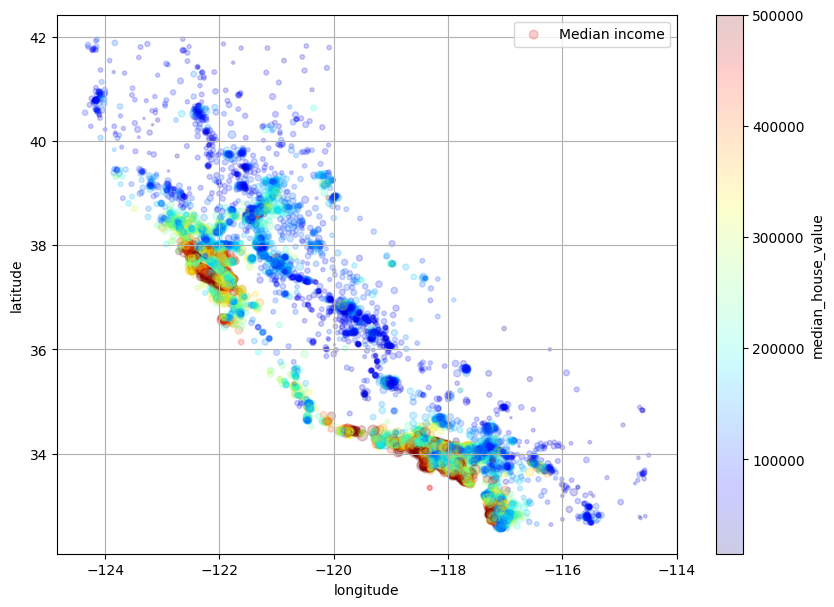

In [80]:
# Relacion entre el median income y su valor
housing.plot(kind="scatter", 
			 x="longitude", 
			 y="latitude",
			 grid=True, 
			 s=housing["median_income"] * 5,
			 alpha=0.2,
			 label="Median income", 
			 c="median_house_value", 
			 cmap="jet",
			 colorbar=True,
			 legend=True, 
			 sharex=False, 
			 figsize=(10, 7)
			)
plt.show()

- El coeficiente de pearson no es util cuando las relaciones no son lineales
## Tipos de Relaciones Aparte de la Lineal

### 1. **Relación Cuadrática (Parabólica)**
- **Descripción**: Las variables están relacionadas de manera que una de ellas cambia de forma cuadrática respecto a la otra. Esto significa que su relación sigue una curva en forma de parábola.
- **Ejemplo**: La distancia recorrida por un objeto en caída libre con el paso del tiempo, ya que la distancia aumenta de forma cuadrática con el tiempo.
- **Gráfica**: La gráfica tiene forma de "U" o de "∩", dependiendo de la dirección de la parábola.

### 2. **Relación Exponencial**
- **Descripción**: Una de las variables cambia exponencialmente respecto a la otra. Esto significa que una pequeña variación en una de las variables genera un gran cambio en la otra.
- **Ejemplo**: El crecimiento de una población bacteriana donde la población se duplica en cada unidad de tiempo.
- **Gráfica**: La gráfica tiene una forma de curva ascendente (si es creciente) o descendente (si es decreciente).

### 3. **Relación Logarítmica**
- **Descripción**: La relación entre las variables sigue una curva logarítmica. Es común que el cambio de una variable sea muy rápido al principio y luego se estabilice.
- **Ejemplo**: El rendimiento de un sistema que mejora rápidamente al principio, pero después se estabiliza con el tiempo, como en algunos algoritmos de aprendizaje automático.
- **Gráfica**: La gráfica es ascendente pero con una pendiente que disminuye a medida que la variable independiente aumenta.

### 4. **Relación Senoide (Trigonométrica)**
- **Descripción**: Las variables siguen un patrón periódico o cíclico, como una onda senoidal.
- **Ejemplo**: La relación entre la temperatura durante el día y la hora (sube por la mañana, baja por la tarde).
- **Gráfica**: La gráfica tiene una forma de onda que sube y baja de manera regular.

### 5. **Relación de Potencia (Algebraica)**
- **Descripción**: Una variable cambia en función de la otra elevada a una potencia. Este tipo de relación puede ser más general que la cuadrática, ya que puede involucrar potencias fraccionarias o enteras.
- **Ejemplo**: La ley de Coulomb en física, donde la fuerza de atracción entre dos cargas es inversamente proporcional al cuadrado de la distancia entre ellas.
- **Gráfica**: La gráfica puede tener diferentes formas dependiendo de la potencia, como líneas curvas o hiperbólicas.

### 6. **Relación Sigmoide**
- **Descripción**: La relación entre las variables tiene una forma de "S". Esta es común en fenómenos que se estabilizan después de alcanzar ciertos umbrales.
- **Ejemplo**: La relación entre la dosis de un medicamento y el efecto de este, donde inicialmente el efecto aumenta con la dosis, pero después de un cierto punto se estabiliza.
- **Gráfica**: La gráfica tiene una forma de "S" que se aplana al final.

### 7. **Relación Causal**
- **Descripción**: En una relación causal, una variable causa el cambio de la otra. Esto es más allá de la correlación, ya que implica un vínculo directo de causa y efecto.
- **Ejemplo**: La relación entre fumar y el riesgo de enfermedades respiratorias.
- **Gráfica**: Dependiendo del tipo de relación causal, la gráfica puede seguir cualquiera de las formas mencionadas anteriormente.

### Resumen:
- **Relación Cuadrática**: Sigue una curva en forma de parábola.
- **Relación Exponencial**: Cambios rápidos y amplios.
- **Relación Logarítmica**: Cambios rápidos al principio, luego se estabiliza.
- **Relación Senoide**: Patrón periódico o cíclico.
- **Relación de Potencia**: Cambio en función de una potencia.
- **Relación Sigmoide**: Forma de "S", estabilización después de un umbral.
- **Relación Causal**: Una variable causa el cambio en la otra.


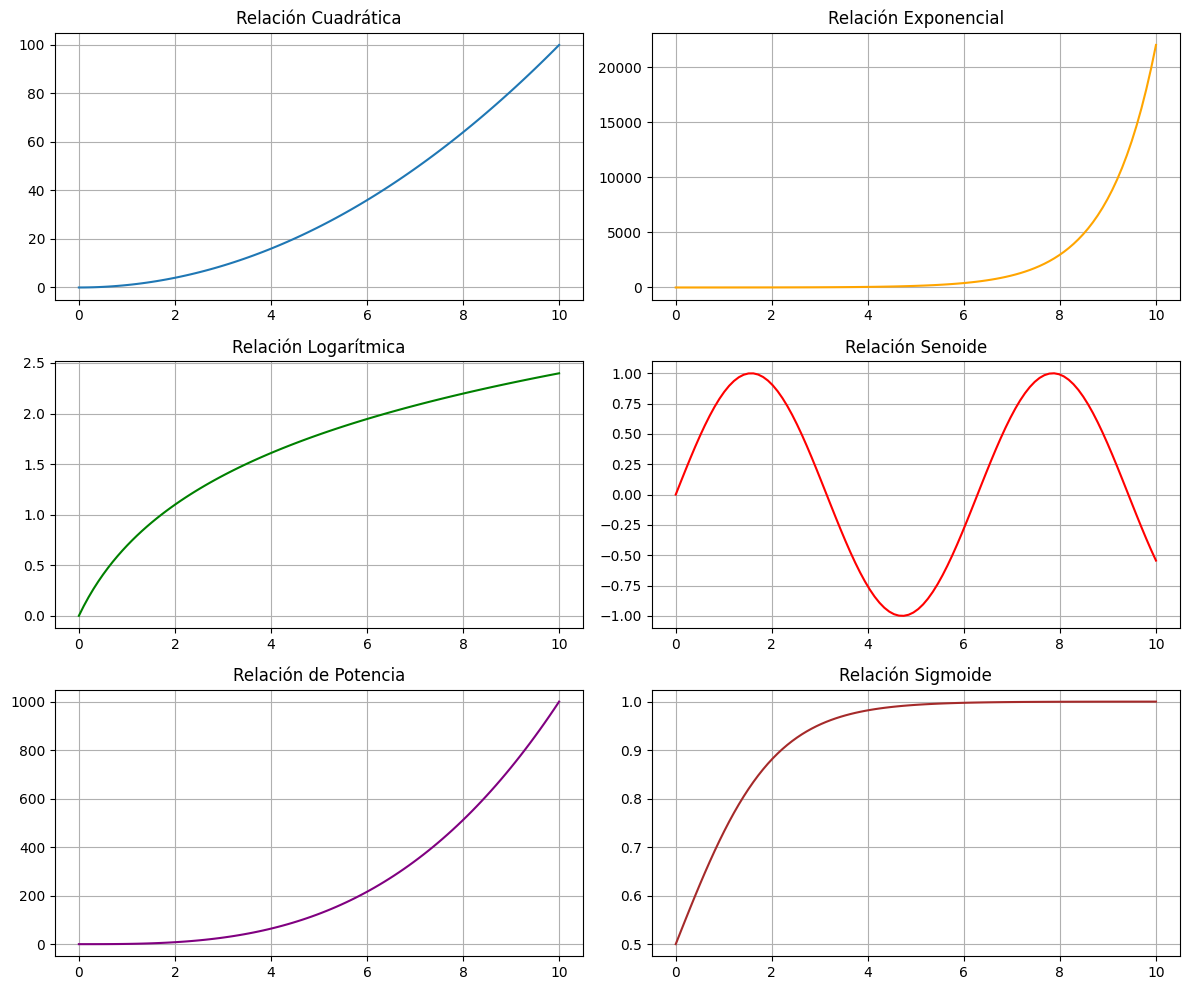

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.linspace(0, 10, 100)

# Relación Cuadrática
y_quadratic = x**2

# Relación Exponencial
y_exponential = np.exp(x)

# Relación Logarítmica
y_logarithmic = np.log(x + 1)

# Relación Senoide
y_sine = np.sin(x)

# Relación de Potencia
y_power = x**3

# Relación Sigmoide
y_sigmoid = 1 / (1 + np.exp(-x))

# Graficar
plt.figure(figsize=(12, 10))

# Subgráficos para cada relación
plt.subplot(3, 2, 1)
plt.plot(x, y_quadratic, label="Cuadrática")
plt.title("Relación Cuadrática")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x, y_exponential, label="Exponencial", color="orange")
plt.title("Relación Exponencial")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x, y_logarithmic, label="Logarítmica", color="green")
plt.title("Relación Logarítmica")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x, y_sine, label="Senoide", color="red")
plt.title("Relación Senoide")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x, y_power, label="De Potencia", color="purple")
plt.title("Relación de Potencia")
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(x, y_sigmoid, label="Sigmoide", color="brown")
plt.title("Relación Sigmoide")
plt.grid(True)

plt.tight_layout()
plt.show()

## Otra forma de visualizar la correlacion entre las variables

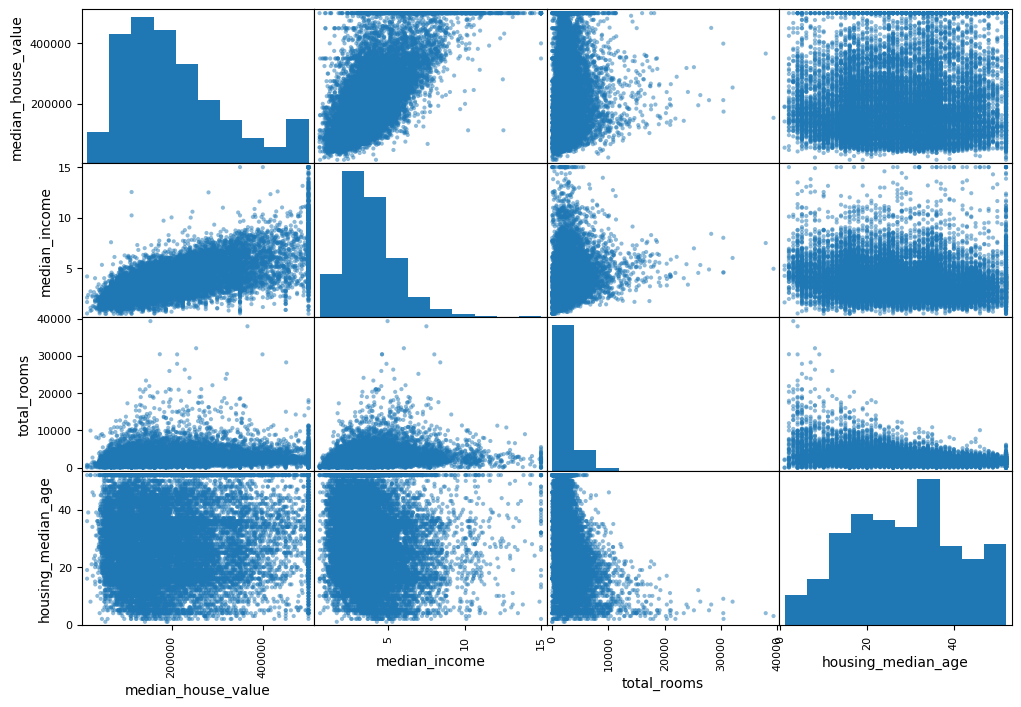

In [82]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

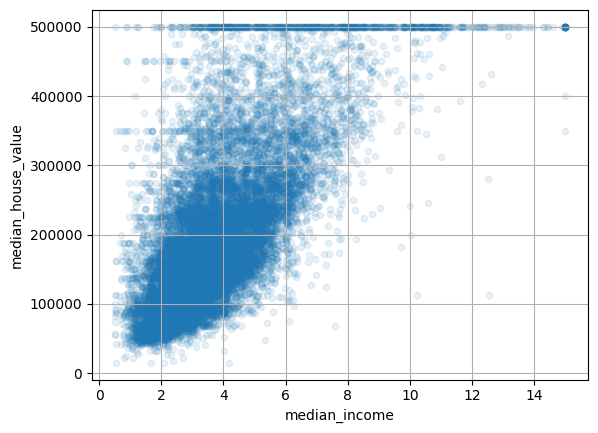

In [83]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

- Se pueden ver diferentes lineas horizontales, puede que sea util remover estas para evitar que el modelo las reproduzca

### Experimentar con combinaciones de atributos

In [84]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["beedroms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [85]:
housing.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,beedroms_ratio,people_per_house
12634,-122.55,38.01,27.0,3966.0,577.0,1657.0,611.0,6.3314,342200.0,NEAR BAY,6.490998,0.145487,2.711948


In [86]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
beedroms_ratio       -0.256397
Name: median_house_value, dtype: float64

## Preparar los datos para los algoritmos de ML
- Es util escribir funciones que transformen los datos que sean facilmente reproducibles y reutilizables
- separar las etiquetas del dataset es util para no aplicar las transformaciones en las etiquetas

In [87]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data cleaning 
- La mayoria de algoritmos no funcionan con atributos faltantes, por lo que es necesario limpiar el dataset

In [89]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [90]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [91]:
# elimina las filas con null
housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [92]:
# Elimina la columna 
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis=1, inplace=True)
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [94]:
# Remplazar los valores nulos con scikit
from sklearn.impute import SimpleImputer
# Se crea una instancia de SimpleImputer
imputer = SimpleImputer(strategy="median")

In [95]:
# Este solo admite atributos numericos por lo que es necesario remover los atributos no numericos
housing_num = housing.select_dtypes(include=[np.number])

In [96]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [97]:
# Guarda las medias de cada uno de las columna
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [98]:
# comprobando que los valores sean los mismos
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [100]:
# Se transforma el dataset
X = imputer.transform(housing_num)

In [101]:
# Se vuelve a crear el dataframe con los valores transformados
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [102]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


## Principios de diseño de scikit learn
- **Consistencia**: Todos los objetos  comparten una interfaz consistente
	- **Estimators**: aquellos que pueden estimar parametros apartir de un dataset, estos reciben uno o dos dataset (si es supervisado) y cualquier otro parametro es llamado hiperparametro
	- **Transformers**: Algunos estimators tambien pueden transformar un dataset con el metodo `transform()`
	- **Predictors**: alguno estimators pueden realizar predicciones apartir de un dataset como `LinearRegression`, estos tienen un metodo `predict()`, tambien tienen un metodo `score()` que mide la calidad de las predicciones dado un test set
- **Inspection**: Todos los hiperparametros de los inspectors son accesibles asi como los parametos aprendidos
- **Nonproliferation of classes**: Los data sets son representados como arrays de numpy o matrices de scipy y los hiperparametros como ints y strings
- **Composition**: Los bloqques de construccion existentes son reusados tanto como se pueda
- **Sensible defaults**: Viene ya con valores por defecto razonables
	
## Handling text and categorical attributes

In [103]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [104]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [105]:
housing_cat_encoded[:5]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [108]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- Esta representacion tiene problemas, ya que el algoritmo pensara que hay cercania en estos atributos
- para solucionar esto se puede usar one-hot encoding 
## El problema de las representaciones numéricas para categorías

Cuando usamos valores numéricos para representar categorías, como en la columna `ocean_proximity`, los algoritmos de Machine Learning (ML) pueden asumir que las categorías cercanas entre sí son más similares que las distantes. Este supuesto funciona bien para categorías ordenadas, como "malo", "promedio", "bueno" y "excelente", porque tienen un orden natural. Sin embargo, en el caso de `ocean_proximity`, esto no tiene sentido. Por ejemplo, la categoría "0" ("<1H OCEAN") y la categoría "4" ("INLAND") son claramente diferentes, pero el modelo podría pensar que están más relacionadas solo porque sus valores numéricos (0 y 4) están cerca.

## La solución: One-hot encoding

La técnica más efectiva para resolver este problema es el **one-hot encoding**. En lugar de asignar un número a cada categoría, esta técnica crea una nueva columna para cada categoría, y en cada fila, una de esas columnas tendrá un valor de **1** (lo que significa que la categoría está presente en esa fila), y las otras tendrán un valor de **0**. Por ejemplo:

- Si la categoría es "<1H OCEAN", la columna correspondiente a "<1H OCEAN" tendrá un 1, y todas las demás columnas (por ejemplo, "INLAND", "NEAR BAY", etc.) tendrán un 0.
- Si la categoría es "INLAND", entonces solo la columna de "INLAND" tendrá un 1, y todas las demás columnas serán 0.

Este proceso se llama **one-hot encoding** porque solo una columna está "caliente" (es decir, tiene un 1), y las demás están "frías" (tienen 0).

## ¿Por qué es útil?

Este enfoque evita que el modelo de ML asuma que las categorías numéricas tienen una relación de proximidad, y en su lugar permite que el modelo trate cada categoría de manera independiente, sin que ninguna se considere más "cercana" a otra.

## Implementación en Scikit-Learn

Scikit-Learn tiene una clase llamada **OneHotEncoder** que convierte automáticamente las categorías en estos vectores de one-hot encoding.

### Ejemplo de código:

Supongamos que tienes un pequeño conjunto de datos con una columna de `ocean_proximity`, con algunas categorías como "<1H OCEAN", "INLAND" y "NEAR BAY". El siguiente código muestra cómo usar **OneHotEncoder** de Scikit-Learn para convertir estas categorías en representaciones de one-hot encoding.


In [112]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [113]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

- Esta sparse matrix es util cuando se tienen miles de categorias
- Sparse matrix esta llena de 0 excepto por un uno en cada fila, por lo que puede ser util guardar la posicion del uno en vez de toda la matriz

In [114]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [116]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [117]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [120]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [163]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [165]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [166]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [167]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [168]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [169]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


## Feature scaling
- Los algoritmos no se desempeñan de buena manera si los datos estan en diferentes escalas 
- Hay varias maneras de escalar los datos, min-max y standarization
### Min-Max (Normalizacion)
- Los valores son escalados entre 1 y 0 o un rango definido

In [177]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_std_scaled = min_max_scaler.fit_transform(housing_num)

### Estandarizacion 
- Esta primero resta el valore medio y luego divide el resultado por la desviacion estandar
- No tiene un rango especifico
- Se ve menos afectada por valores atipicos o valores erroneos

In [178]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

- A los algoritmos no les gusta los datos con cola pesada por lo que antes de escalar es recomendable transformar para eliminar la cola pesada y conseguir unos datos lo mas simetricos posibles
- o tambien se puede agrupar los valores con sus percentiles

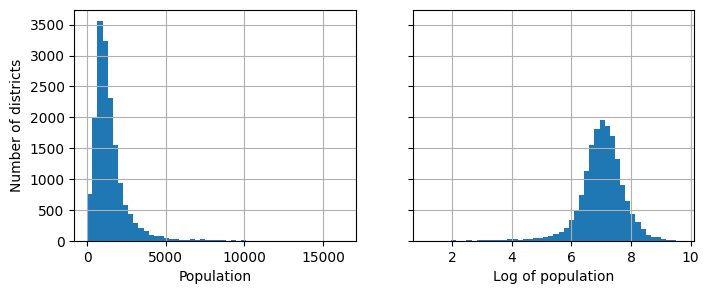

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

- Cuando existen distribuciones multimodales tambien se debe transformar los datos, una estrategia puede ser one-hot encoder o usar una funcion de base radial para formar categorias

### Transformación de distribuciones multimodales usando RBF

En algunos casos, las distribuciones de datos no son fáciles de manejar porque tienen **múltiples picos** (son multimodales). Para abordar este problema, se puede crear una **nueva característica** que mida qué tan similar es cada valor con respecto a uno de esos picos (llamados **modos principales**). 

#### ¿Cómo medir la similitud?
La **similitud** se mide utilizando una **función de base radial (RBF)**, que depende de la **distancia** entre los valores de entrada y un punto fijo. El ejemplo más común es el **RBF Gaussiano**, definido así:

\[
\text{Similitud RBF Gaussiana} = \exp(-\gamma(x - c)^2)
\]

- \(x\): El valor de entrada (por ejemplo, la edad promedio de una vivienda).
- \(c\): El modo principal al que estás comparando (por ejemplo, 35 años).
- \(\gamma\) (gamma): Un hiperparámetro que controla qué tan rápido disminuye la similitud cuando \(x\) se aleja de \(c\).

#### Propiedades del RBF Gaussiano:
- Cuando \(x\) está cerca de \(c\), la similitud es alta (cercana a 1).
- Cuando \(x\) está lejos de \(c\), la similitud disminuye rápidamente (cercana a 0).

#### Transformación de datos multimodales
Si un conjunto de datos tiene varios **modos principales**, puedes calcular una nueva característica de similitud para cada uno de esos modos. Esto ayuda a los modelos de Machine Learning a capturar patrones más complejos en los datos.



In [183]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

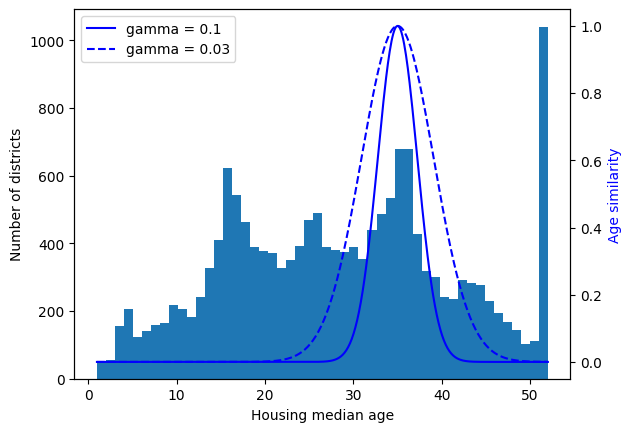

In [184]:
ages = np.linspace(housing["housing_median_age"].min(),
				   housing["housing_median_age"].max(),
				   500).reshape(-1, 1)
				   
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()
color="blue"
ax2.plot(ages, rbf1, color=color, label=f"gamma = {gamma1}")
ax2.plot(ages, rbf2, color=color, label=f"gamma = {gamma2}", linestyle="--")
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()



- Puede que si los datos de salida (las etiquetas) tambien tiene una cola pesada, haya que transformarlas, por lo que se tendria que reversar la transformacion despues de la prediccion

In [196]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] 

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [197]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [198]:
from sklearn.compose import TransformedTargetRegressor
 
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [199]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Custom transformers
- Se puede querer que nuestros transformes funcionen tambien como los de scikit
- esto se puede lograr simplemente añadiendo los metodos `fit()`, `transform()` y `fit_transform()`
- O se puede lograr tambien añadir como clase base `TransformerMixin` para añadir el metodo `fit_transform()` o la clase `BaseEstimator` para obterner los metodos `get_params()` y `set_params()` que seran utiles para afinar los hiperparametros automaticamente

In [201]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

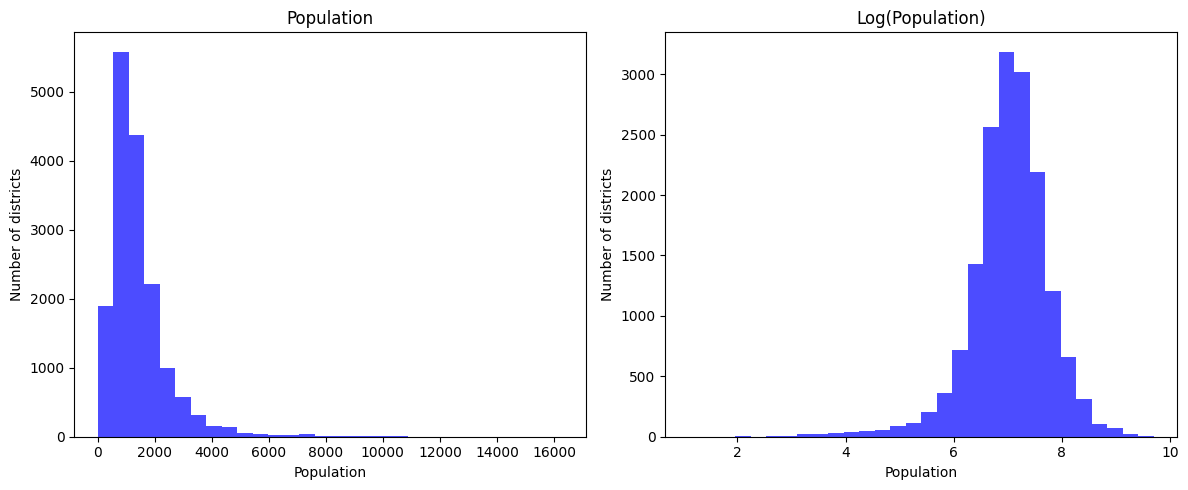

In [209]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(housing["population"], bins=30, color="blue", alpha=0.7)
axes[0].set_title("Population")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Number of districts")

axes[1].hist(log_pop, bins=30, color="blue", alpha=0.7)
axes[1].set_title("Log(Population)")
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Number of districts")

plt.tight_layout()
plt.show()

In [211]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_rbf = rbf_transformer.transform(housing[["housing_median_age"]])

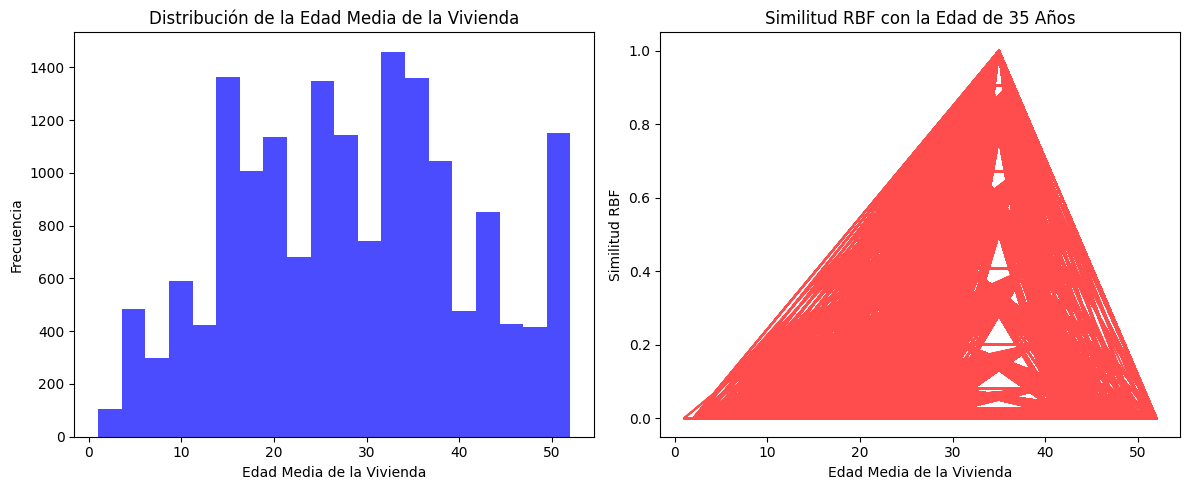

In [218]:
gamma = 0.1
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=gamma).flatten()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(housing["housing_median_age"], bins=20, color="blue", alpha=0.7)
axes[0].set_title("Distribución de la Edad Media de la Vivienda")
axes[0].set_xlabel("Edad Media de la Vivienda")
axes[0].set_ylabel("Frecuencia")

axes[1].plot(housing["housing_median_age"], age_simil_35, color="red", alpha=0.7)
axes[1].set_title("Similitud RBF con la Edad de 35 Años")
axes[1].set_xlabel("Edad Media de la Vivienda")
axes[1].set_ylabel("Similitud RBF")

plt.tight_layout()
plt.show()

In [220]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [221]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]], shape=(16512, 1))

In [222]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [223]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
	def __init__(self, with_mean=True):
		self.with_mean = with_mean
		
	def fit(self, X, y=None):
		X = check_array(X)
		self.mean_ = X.mean(axis=0)
		self.scale_ = X.std(axis=0)
		self.n_features_in_  = X.shape[1]
		return self
	
	def transform(self, X):
		check_is_fitted(self)
		X = check_array(X)
		assert self.n_features_in_ == X.shape[1]
		if self.with_mean:
			X = X - self.mean_
		return X / self.scale_

In [226]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
		self.n_clusters = n_clusters
		self.gamma = gamma
		self.random_state = random_state
	
	def fit(self, X, y=None, sample_weight=None):
		self.kmeans_ = KMeans(self.n_clusters, n_init=10,
						random_state=self.random_state)
		self.kmeans_.fit(X, sample_weight=sample_weight)
		return self
	
	def transform(self, X):
		return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
	
	def get_feature_names_out(self, names=None):
		return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [240]:
import os

os.environ['OMP_NUM_THREADS'] = '1'

In [241]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)

In [244]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

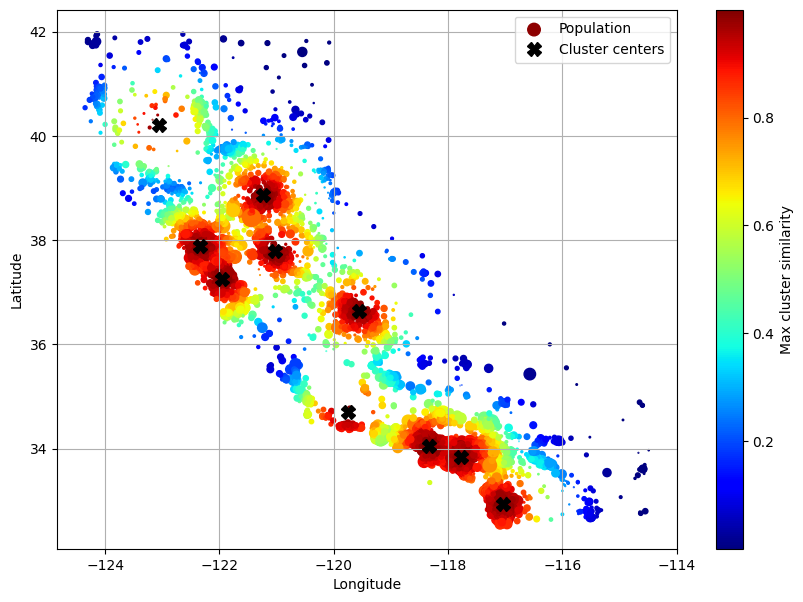

In [250]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})

housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
					 s=housing_renamed["Population"] / 100, label="Population", 
					 c="Max cluster similarity",
					 cmap="jet", colorbar=True,
					 legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
		 cluster_simil.kmeans_.cluster_centers_[:, 0],
		 linestyle="", color="black", marker="X", markersize=10, label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

## Transformation pipelines
- En el proceso de transformacion hay diferentes pasos por lo que es importante ejecutalos de manera correcta
- Scikit tiene una clase pipeline

In [251]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
	("impute", SimpleImputer(strategy="median")),
	("standarize", StandardScaler())
])

In [269]:
from sklearn.pipeline import make_pipeline
 
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())


- el pipeline expone los mismos metodos que el estimador final, por esto mismo este puede actuar como transforer o predictor

In [256]:
from sklearn import set_config

set_config(display="diagram")

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [257]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [259]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
									   index=housing_num.index)


In [260]:
df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


In [261]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [273]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
	SimpleImputer(strategy="most_frequent"),
	OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	("cat", cat_pipeline, cat_attribs)
])

In [274]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
	(num_pipeline, make_column_selector(dtype_include=np.number)),
	(cat_pipeline, make_column_selector(dtype_include=object))
)

In [275]:
housing_prepared = preprocessing.fit_transform(housing)

In [277]:
housing_prepared_fr = pd.DataFrame(
	housing_prepared,
	columns=preprocessing.get_feature_names_out(),
	index=housing.index
)

In [278]:
housing_prepared_fr

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [283]:
def column_ratio(X):
	return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
	return ["ratio"]
	
def ratio_pipeline():
	return make_pipeline(
		SimpleImputer(strategy="median"),
		FunctionTransformer(column_ratio, feature_names_out=ratio_name), 
		StandardScaler())

log_pipeline = make_pipeline(
	SimpleImputer(strategy="median"),
	FunctionTransformer(np.log, feature_names_out="one-to-one"),
	StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
	("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
	("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
	("people_per_house", ratio_pipeline(), ["population", "households"]),
	("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
	("geo", cluster_simil, ["latitude", "longitude"]),
	("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline)

In [284]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [285]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [286]:
housing_prepared_fr = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)

In [288]:
housing_prepared_fr.head()

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,8.708837e-08,9.712456e-01,...,7.114441e-04,3.070969e-17,1.314047e-01,5.740031e-01,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,1.181328e-01,9.738096e-14,...,3.045359e-27,5.437838e-01,1.735342e-09,2.275194e-10,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,2.295286e-08,7.457782e-01,...,4.750719e-03,1.605970e-17,2.744847e-01,2.839978e-01,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,4.618947e-04,3.873884e-20,...,2.916178e-35,7.405721e-01,2.243339e-14,4.218649e-16,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,3.166634e-02,7.905346e-16,...,2.843975e-30,7.501278e-01,2.890866e-11,3.710912e-12,0.0,0.0,0.0,0.0,1.0,0.589800


## Seleccionar y entrenar el modelo

In [289]:
from sklearn.linear_model import LinearRegression

line_reg = make_pipeline(preprocessing, LinearRegression())
line_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D39BCF0A40>)])),
                ('linearregression', LinearRegression())])

In [290]:
housing_predictions = line_reg.predict(housing)
housing_predictions[:5].round(-2)

array([242800., 375900., 127500.,  99400., 324600.])

In [298]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68647.95686706669

- El modelo tiene un error bastante grande
- El modelo esta underfitting, esto significa que las caracteristicas de los datos no proveen suficiente informacion
- La solucion es escoger un modelo mas complejo

In [301]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D39BCF0A40>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [302]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)

tree_rmse

0.0

### Better evaluation using cross-validation
- Una  alternativa a realizar cross-validation de manera manual es usar K.fold cross-validation de scikit, que divide el training set en 10 partes diferentes llamadas folds y evalua y en
rena 10 el modelo
- se le agrega un negativo, ya que esta funcion no usa una funcion de coste sino una funcion de utilidad

In [305]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [306]:
tree_rmses

array([64854.86006934, 63557.65500684, 65663.3837676 , 65453.91538918,
       64456.37635524, 66919.47216599, 66110.41040337, 68532.21066423,
       69530.30110106, 68591.25110456])

In [307]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66366.983603
std       1976.844743
min      63557.655007
25%      65004.623899
50%      65886.897085
75%      68129.026040
max      69530.301101
dtype: float64

In [308]:
lin_rmses = -cross_val_score(line_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69847.923224
std       4078.407329
min      65659.761079
25%      68088.799156
50%      68697.591463
75%      69800.966364
max      80685.254832
dtype: float64

-  Construir un modelo a partir de otros modelos se conoce como ensemble learning

In [309]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [310]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     46938.209246
std       1018.397196
min      45522.649195
25%      46291.334639
50%      47021.703303
75%      47321.521991
max      49140.832210
dtype: float64

In [311]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)

forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

17521.565358779884

## Fine-tune your model
### Grid search 
- Una forma de ajustar el modelo es ajustar los hiperparametros de manera manual, lo que no es optimo
- A grid search se le dice que hiperparametros se quiere experimentar y sus valores, y evaluara todas sus posibles combinaciones haciendo cross validation


In [312]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
	("preprocessing", preprocessing),
	("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
	{
		"preprocessing__geo__n_clusters": [5, 8, 10],
  	 	"random_forest__max_features": [4, 6, 8]
	},
	{
		"preprocessing__geo__n_clusters": [10, 15],
  	 	"random_forest__max_features": [6, 8, 10]
	}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D39BCF0A40>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [313]:
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__transform_input', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 

In [314]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [315]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001D...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D3C29EB110>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
0,5,4,45907,46208,47371,46495
1,5,6,46516,46386,47469,46790
2,5,8,46919,46958,47862,47247
3,8,4,44386,44490,45257,44711
4,8,6,44579,44713,45550,44947


In [336]:
min_index = cv_res["mean_test_rmse"].idxmin()
cv_res.loc[min_index]

n_clusters           15
max_features          6
split0            43007
split1            43683
split2            44158
mean_test_rmse    43616
Name: 12, dtype: int64

### Randomized search
- Evalua un numero fijo de combinaciones y selecciona un valor aleatorio para cada hiperparametro

In [340]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
	"preprocessing__geo__n_clusters": randint(low=3, high=50),
	"random_forest__max_features": randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(
	full_pipeline, 
	param_distributions=param_distribs,
	n_iter=10,
	cv=3,
	scoring="neg_root_mean_squared_error",
	random_state=42
)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D3AB176900>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D3E1372750>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [341]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41224,42385,42712,42107
8,32,7,41374,42579,43230,42394
0,41,16,42397,42640,43175,42738
5,42,4,41874,43348,43690,42971
2,23,8,42421,43138,43585,43048


In [343]:
min_index = cv_res["mean_test_rmse"].idxmin()
cv_res.loc[min_index]

n_clusters           45
max_features          9
split0            41224
split1            42385
split2            42712
mean_test_rmse    42107
Name: 1, dtype: int64

### Ensemble methods
- Otra forma de ajustar los modelos es intentar juntar modelos

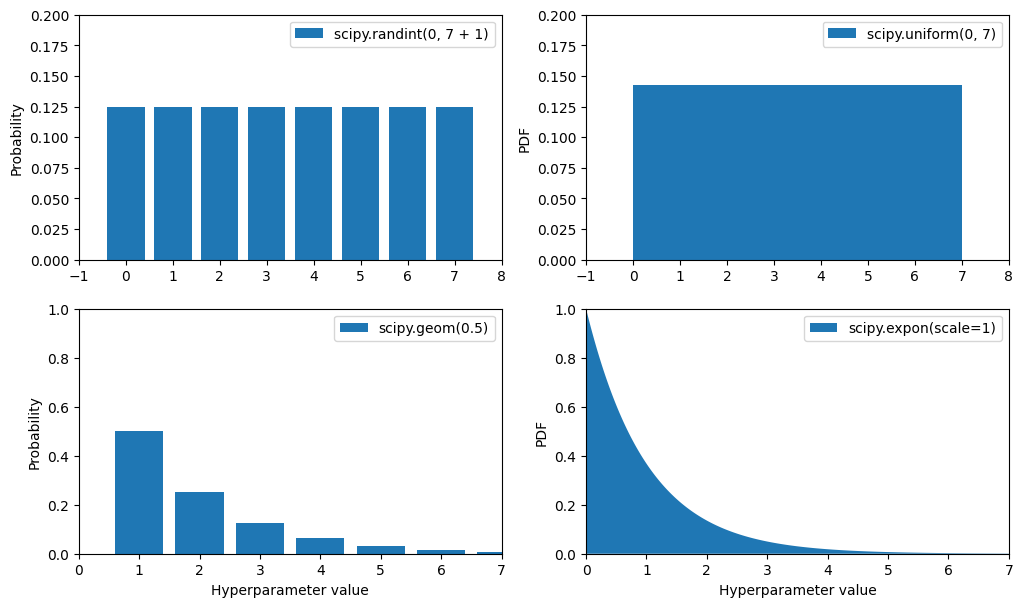

In [339]:
from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

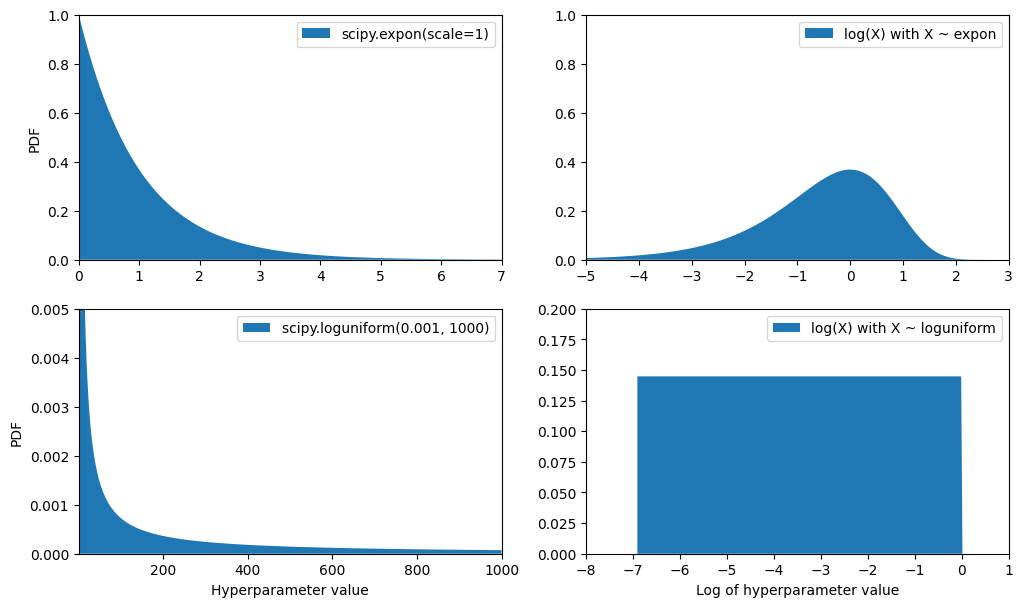

In [344]:
from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

## Bonus Section: How to Choose the Sampling Distribution for a Hyperparameter

Cuando ajustas un hiperparámetro, necesitas decidir cómo generar valores de prueba. Esto se hace eligiendo una **distribución de muestreo** que describe cómo quieres explorar los valores posibles. Aquí están las opciones más comunes y cuándo usarlas:

## `scipy.stats.randint(a, b+1)`
- **Qué es**: Genera números enteros aleatorios entre `a` y `b` (incluidos).
- **Cuándo usarlo**: Cuando el hiperparámetro solo toma valores enteros dentro de un rango y todos tienen la misma probabilidad.  
- **Ejemplo**: Número de capas en una red neuronal, como 1, 2, 3, o 4.

## `scipy.stats.uniform(a, b)`
- **Qué es**: Genera números continuos entre `a` y `b` con igual probabilidad.
- **Cuándo usarlo**: Para hiperparámetros continuos donde cualquier valor en el rango es igual de probable.  
- **Ejemplo**: Tasa de aprendizaje entre 0.001 y 0.01.

## `scipy.stats.geom(1 / scale)`
- **Qué es**: Genera valores enteros con una tendencia hacia un rango específico (cercano al `scale`), pero con algunos valores mucho más grandes o pequeños.
- **Cuándo usarlo**: Para hiperparámetros enteros donde crees que la mayoría de los valores estarán cerca de una escala específica, pero quieres explorar valores fuera de ese rango.  
- **Ejemplo**: Número de unidades en una capa, con un promedio de 1000 pero ocasionalmente valores más pequeños o más grandes.

## `scipy.stats.expon(scale)`
- **Qué es**: Similar a `geom`, pero para valores continuos. Genera valores alrededor de una escala, con algunos más grandes o pequeños.
- **Cuándo usarlo**: Para hiperparámetros continuos donde el valor más probable está alrededor de una escala específica.  
- **Ejemplo**: Tasa de desintegración de un modelo.

## `scipy.stats.loguniform(a, b)`
- **Qué es**: Genera valores en un rango amplio, donde cada escala es igualmente probable (por ejemplo, entre 0.1 y 1 es tan probable como entre 10 y 100).
- **Cuándo usarlo**: Cuando no tienes idea de cuál es la escala correcta del hiperparámetro.  
- **Ejemplo**: Parámetros como regularización (0.001 a 100), donde no sabes si los valores pequeños o grandes son mejores.

## Resumen Fácil
- **`randint`**: Para valores enteros en un rango fijo.
- **`uniform`**: Para valores continuos en un rango fijo.
- **`geom` y `expon`**: Para valores que suelen estar cerca de un número, pero permiten extremos.
- **`loguniform`**: Cuando no tienes idea del rango correcto y quieres explorar muchas escalas.
## Analyzing the best models and their errors

In [347]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.02, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [348]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(np.float64(0.18883049114642353), 'log__median_income'),
 (np.float64(0.0755069016595242), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06427087748676083), 'bedrooms__ratio'),
 (np.float64(0.05216955099698511), 'rooms_per_house__ratio'),
 (np.float64(0.046642586962406155), 'people_per_house__ratio'),
 (np.float64(0.04244311259449022), 'geo__Cluster 3 similarity'),
 (np.float64(0.023291063179546732), 'geo__Cluster 17 similarity'),
 (np.float64(0.022649484211911698), 'geo__Cluster 18 similarity'),
 (np.float64(0.021972435766805798), 'geo__Cluster 22 similarity'),
 (np.float64(0.01881537204558838), 'geo__Cluster 40 similarity'),
 (np.float64(0.017669986767360032), 'geo__Cluster 10 similarity'),
 (np.float64(0.017546949538486258), 'geo__Cluster 35 similarity'),
 (np.float64(0.01727490371775081), 'geo__Cluster 41 similarity'),
 (np.float64(0.016055663107420102), 'geo__Cluster 6 similarity'),
 (np.float64(0.015811758952117748), 'geo__Cluster 2 similarity'),
 (np.float64(0.0147775594046303

- Con esta informacion, se puede eliminar caracteristicas que sean poco utiles
## Evaluate your system on the test set

In [352]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

41556.053474456494

In [353]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([39415.11928419, 43591.96637635])

In [364]:
epsilon = 1e-10 
percentage_error = ((abs(final_predictions - y_test) * 100) / (y_test + epsilon)).mean()

In [365]:
percentage_error

np.float64(14.369632664692832)

## Launch, Monitor, and Mantain your system
- Antes de desplegar el modelo, hay que escribir documentacion y test 
- Hay que guardar el modelo

In [395]:
import joblib

joblib.dump(final_model, "my_cali_housing_model.pkl")

['my_cali_housing_model.pkl']

In [396]:
final_model_reloaded = joblib.load("my_cali_housing_model.pkl")

new_data = housing.iloc[:5]
predictions = final_model_reloaded.predict(new_data)

In [397]:
predictions

array([442520.14, 452569.09, 105878.  ,  99171.  , 330284.02])

- Es bueno que el modelo se cargue en el inicio del servidor, no cada que se use
- Es importante monitorizar constantemente el modelo, para detectar posibles errores
- Si los datos cambian constantemente, es importante reentrenar el modelo regularmente, esto se puede automatizar
- Asi como es de importante monitorizar el modelo, es importante monitorizar los datos que entran al modelo y su calidad, debido a que el modelo puede bajar el rendimiento debido a la baja calida de los datos entrantes
- Es importante tener backups de los modelos y los datasets, asi como las herramientas para hacer rollback en caso de ser necesario.

## Exercises
1. Try a support vector machine regressor (sklearn.svm.SVR) with various
hyperparameters, such as kernel="linear" (with various values for the C
hyperparameter) or kernel="rbf" (with various values for the C and
gamma hyperparameters). Note that support vector machines don’t scale
well to large datasets, so you should probably train your model on just
the first 5,000 instances of the training set and use only 3-fold crossvalidation, or else it will take hours. Don’t worry about what the
hyperparameters mean for now; we’ll discuss them in Chapter 5. How
does the best SVR predictor perform?

In [398]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
	{
		"svr__kernel": ["linear"], 
		"svr__C": [10, 30, 100, 300, 1000, 3000, 10000, 30000]
	},
	{
		"svr__kernel": ["rbf"], 
		"svr__C": [1, 3, 10, 30, 100, 300, 1000], 
		"svr__gamma": [0.01, 0.03, 0.1, 0.3, 1, 3]
	},
]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")

grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D39BCF0A40>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10, 30, 100, 300, 1000, 3000, 10000,
                                     30000],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1, 3, 10, 30, 100, 300, 1000],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1, 3],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

In [399]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

np.float64(69951.46878656668)

In [400]:
grid_search.best_params_

{'svr__C': 10000, 'svr__kernel': 'linear'}

2. Try replacing the GridSearchCV with a RandomizedSearchCV.


In [401]:
from scipy.stats import loguniform, expon 

param_distribs = {
	"svr__kernel": ["linear", "rbf"],
	"svr__C": loguniform(20, 200_000),
	"svr__gamma": expon(scale=1)
}

rnd_search = RandomizedSearchCV(svr_pipeline, 
								param_distributions=param_distribs,
								n_iter=50,
								cv=3,
								scoring="neg_root_mean_squared_error",
								random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000001D39BCF0A40>)])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D3E39A6480>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D3E25736E0>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [402]:
rnd_search_rmse = -rnd_search.best_score_
rnd_search_rmse

np.float64(55805.373328549904)

In [403]:
rnd_search.best_params_

{'svr__C': np.float64(157055.10989448498),
 'svr__gamma': np.float64(0.26497040005002437),
 'svr__kernel': 'rbf'}

3. Try adding a SelectFromModel transformer in the preparation pipeline to select only the most important attributes.

In [404]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
	("preprocessing", preprocessing),
	("selector", SelectFromModel(RandomForestRegressor(random_state=42), threshold=0.005)),
	("svr", SVR(C=rnd_search.best_params_["svr__C"],
			    gamma=rnd_search.best_params_["svr__gamma"],
				kernel=rnd_search.best_params_["svr__kernel"]))
])

In [405]:
selector_rmses = -cross_val_score(selector_pipeline,
								  housing.iloc[:5000], 
								  housing_labels.iloc[:5000],
								  scoring="neg_root_mean_squared_error",
								  cv=3)
pd.Series(selector_rmses).describe()
								  

count        3.000000
mean     56159.173694
std       2006.373935
min      53992.282125
25%      55262.495852
50%      56532.709580
75%      57242.619478
max      57952.529377
dtype: float64

4. Try creating a custom transformer that trains a k-Nearest Neighbors regressor (sklearn.neighbors.KNeighborsRegressor) in its fit() method, and outputs the model's predictions in its transform() method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts.

In [423]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone

class FeatureFromRegressor(MetaEstimatorMixin, TransformerMixin, BaseEstimator,):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  
    
    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

In [424]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

[{'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_cloneable',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_cloneable',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_tags_renamed',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_valid_tag_types',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 

In [425]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[486100.66666667],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]], shape=(16512, 1))

In [426]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

In [428]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns) for name, transformer, columns in preprocessing.transformers]

geo_index = [name for name, _, _, in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [431]:
new_geo_pipeline = Pipeline([
	("preprocessing", new_geo_preprocessing),
	("svr", SVR(C=rnd_search.best_params_["svr__C"],
				gamma=rnd_search.best_params_["svr__gamma"],
				kernel=rnd_search.best_params_["svr__kernel"]))
])

In [434]:
new_pepes_rmses = -cross_val_score(new_geo_pipeline, 
								   housing.iloc[:5000], 
								   housing_labels.iloc[:5000], 
								   scoring="neg_root_mean_squared_error",
								   cv=3)
pd.Series(new_pepes_rmses).describe()

count         3.000000
mean     105035.426084
std        2918.386386
min      101812.943805
25%      103802.990253
50%      105793.036701
75%      106646.667223
max      107500.297745
dtype: float64

5. Automatically explore some preparation options using RandomSearchC.

In [ ]:
param_distribs = {
	"preprocessing__geo__estimator__n_neighbors": range(1, 30),
	"preprocessing__geo__estimator__weights": ["distance", "uniform"],
	"svr__C": loguniform(20, 200_000),
	"svr__gamma": expon(scale=1)
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
										param_distributions=param_distribs,
										n_iter=50,
										cv=3,
										scoring="neg_root_mean_squared_error",
										random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])